In [203]:
#Importing all necessary library's
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [204]:
#Reading the dataset 
wine_df = pd.read_csv('wine.csv',index_col=0)
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


### Checking the number of Rows and Column in dataset

In [205]:
wine_df.shape

(1103, 10)

### Missing Data

In [206]:
wine_df.isnull().sum()

country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

### Checking the datatypes of all fields in dataset

In [207]:
wine_df.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [208]:
wine_df['price'].isnull().value_counts()

False    1046
True       57
Name: price, dtype: int64

#### price column has to be replaced using mean of that column .
#### Region 1 and Region 2 seems to be MAR (Missing at Random)  some way related to one another.
#### Missing data in field Designation can be replaced as None . 

In [209]:
#Checking the null values in price column and replacing with the mean() value
wine_df['price'] = wine_df['price'].fillna(wine_df['price'].mean())
 

In [210]:
#Checking the null values and replacing with other column and None if both columns are missing.
wine_df['region_1'] = wine_df['region_1'].fillna(wine_df['region_2'])
wine_df['region_2'] = wine_df['region_2'].fillna(wine_df['region_1'])
wine_df[['region_1','region_2']] = wine_df[['region_1','region_2']].fillna('None')

In [211]:
wine_df['designation'] = wine_df['designation'].fillna('None')

In [212]:
#Checking the missing values again
wine_df.isnull().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

In [213]:
#Filtering the dataset to contain only 'Cabernet Sauvignon','Pinot Noir','Chardonnay' wines
var_wine_df = wine_df.loc[wine_df['variety'].isin(['Cabernet Sauvignon','Pinot Noir','Chardonnay'])]
wine_df.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,Bandol,Provence red blend,Domaine de la B√©gude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Rom√°n,95,65.0,Northern Spain,Toro,Toro,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum √önico Crianza,95,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodr√≠guez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergstr√∂m
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [214]:
wine_df.shape

(1103, 10)

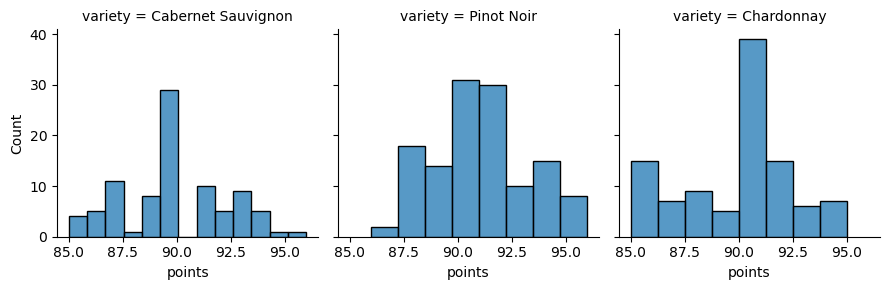

In [215]:
g = sns.FacetGrid(var_wine_df, col="variety")
g.map(sns.histplot,'points')

## wordcloud for variety of wines

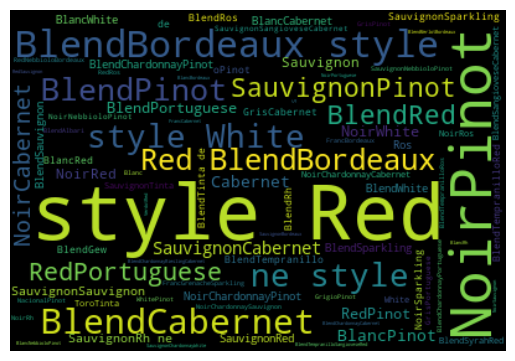

In [216]:
#wordclouds of the Provice  and variety of wine 

text = ''.join(word for word in wine_df['variety'].astype(str))
wordcloud = WordCloud(background_color="black",width=400,height=275).generate(text)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## wordcloud for all Province 

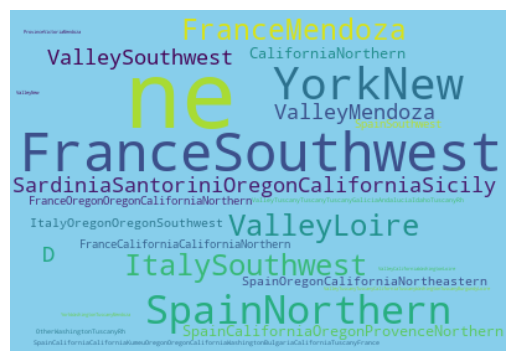

In [217]:
text = ''.join(wine_df['province'].astype(str))
wordcloud = WordCloud(background_color="skyblue",width=400,height=275).generate(text)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()